In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **import Data**

In [3]:
df=pd.read_csv('/content/traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


## **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [6]:
df.isnull().sum().sum()

0

In [7]:
from sklearn.preprocessing import LabelEncoder
leabel_encoder =LabelEncoder()

df['Traffic Situation_numeric']=leabel_encoder.fit_transform(df['Traffic Situation'])
#df.drop('Traffic Situation', axis=1, inplace=True)
print(df['Traffic Situation_numeric'].unique())

[2 3 0 1]


In [8]:
df['Day of the week_numeric']=leabel_encoder.fit_transform(df['Day of the week'])
#df.drop('Day of the week', axis=1, inplace=True)
print(df['Day of the week_numeric'].unique())

[5 6 4 0 2 3 1]


In [9]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object
Traffic Situation_numeric,int64


In [10]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation_numeric,Day of the week_numeric
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624,3.193548
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307,2.007090
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000,1.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000,3.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000,5.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,6.000000


## **visualization**

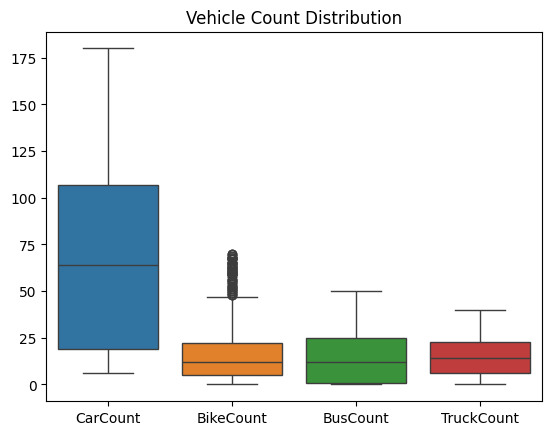

In [11]:
vehicle_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
sns.boxplot(data=df[vehicle_columns])
plt.title("Vehicle Count Distribution")
plt.show()

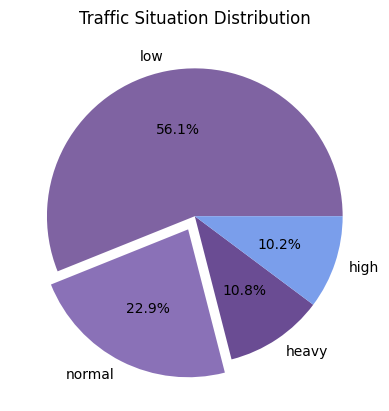

In [12]:
plt.pie(df['Traffic Situation'].value_counts(), labels=df['Traffic Situation'].unique(), autopct='%1.1f%%',colors = [ '#7f63a2', '#8a71b7', '#6a4c93', '#7a9eeb'] ,
       explode = (0,0.1,0,0))
plt.title("Traffic Situation Distribution")
plt.show()

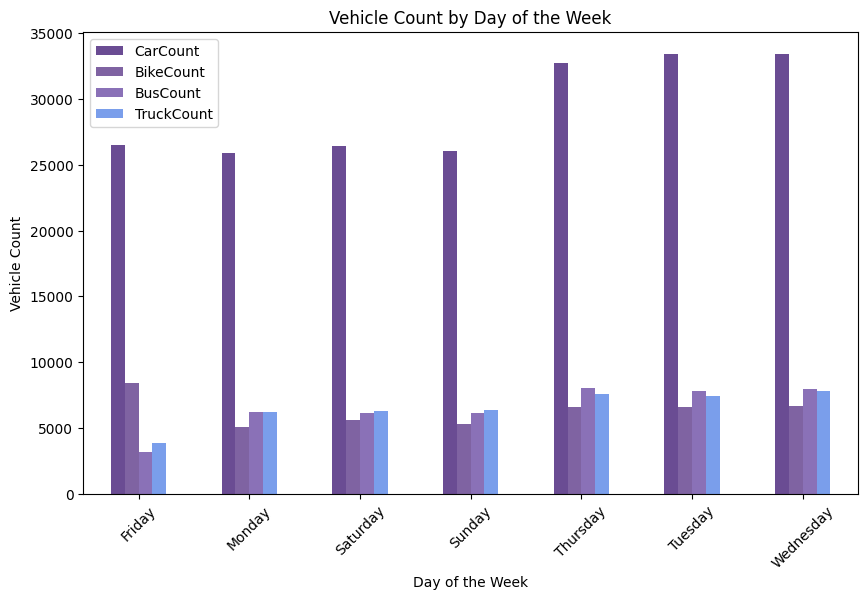

In [13]:
# Calculate the sum of vehicle counts by day of the week
daily_vehicle_counts = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum()

colors = ['#6a4c93', '#7f63a2', '#8a71b7', '#7a9eeb']
daily_vehicle_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Vehicle Count by Day of the Week')
plt.ylabel('Vehicle Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

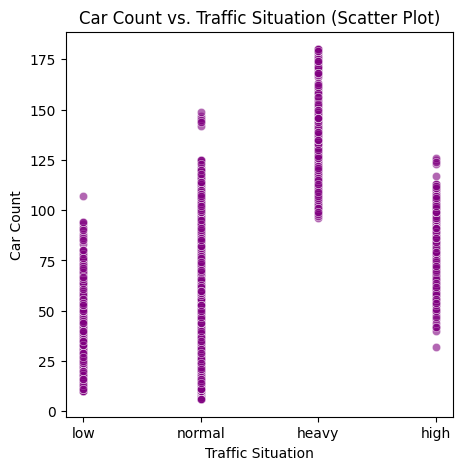

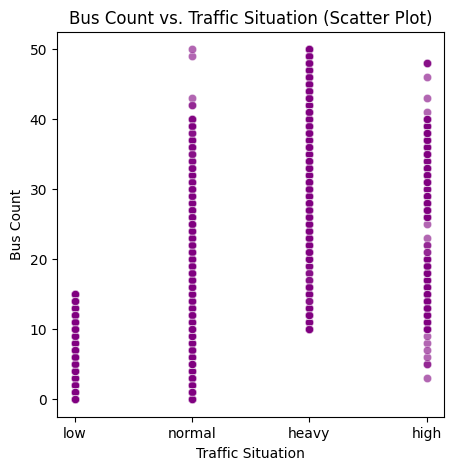

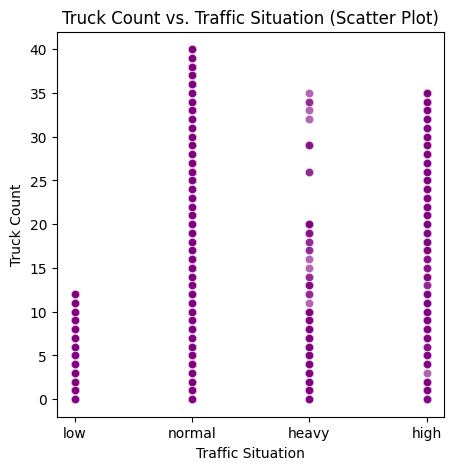

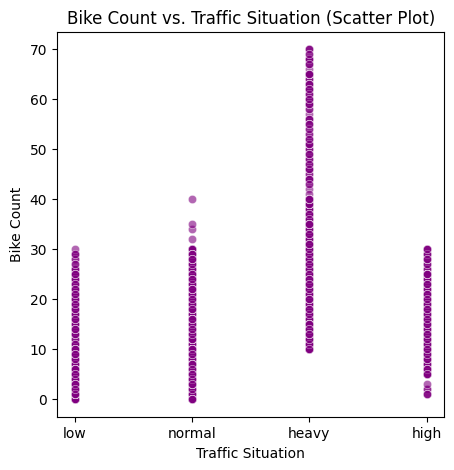

In [14]:
# Car Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='CarCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Car Count")
plt.title("Car Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Bus Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='BusCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Bus Count")
plt.title("Bus Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Truck Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='TruckCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Truck Count")
plt.title("Truck Count vs. Traffic Situation (Scatter Plot)")
plt.show()

# Bike Count
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Traffic Situation', y='BikeCount', data=df, alpha=0.6, color='purple')
plt.xlabel("Traffic Situation")
plt.ylabel("Bike Count")
plt.title("Bike Count vs. Traffic Situation (Scatter Plot)")
plt.show()

In [15]:
df['Total Vehicle Count'] = df['CarCount'] + df['BikeCount'] + df['BusCount'] + df['TruckCount']
summary = df.groupby('Traffic Situation')['Total Vehicle Count'].sum().reset_index()
summary

,Traffic Situation,Total Vehicle Count
0,heavy,135622
1,high,45721
2,low,19758
3,normal,138813


<ipython-input-16-53f5bf44c283>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])    # Convert the 'Time' column to datetime
<ipython-input-16-53f5bf44c283>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Total Vehicle Count', data=hourly_traffic, palette='Purples')


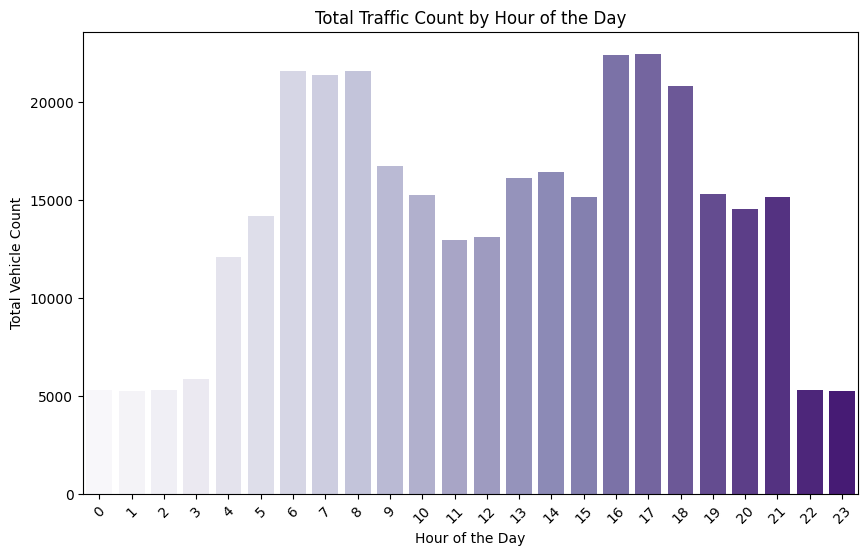

In [16]:
df['Time'] = pd.to_datetime(df['Time'])    # Convert the 'Time' column to datetime
df['Hour'] = df['Time'].dt.hour            # Extract the hour
df['Total Vehicle Count'] = df['CarCount'] + df['BikeCount'] + df['BusCount'] + df['TruckCount']
hourly_traffic = df.groupby('Hour')['Total Vehicle Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Total Vehicle Count', data=hourly_traffic, palette='Purples')
plt.title('Total Traffic Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicle Count')
plt.xticks(rotation=45)
plt.show()